# House Price prediction using machine learning

## Introduction
The project consists of a dataset of 1460 unique houses and their 81 features such as their area, porch size, sunlight exposure, whether or not there is a bathtub and fireplace and much more which will be analysed to predict selling price of another 1459 houses.
Initially EDA has been performed to check relation of sale price with all the features and then a clean up the data to fill up the null values and then different algorithms have been used to find their accuracy in prediction.
The Dataset used is the Ames Housing dataset from Kaggle.


#### Importing Libraries

In [ ]:


# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn= ignore_warn

from scipy import stats
from scipy.stats import norm, skew #for some statistics

### Importing the dataset

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print('Shape of train dataset: {}'.format(train.shape))
print('Shape of test dataset: {}'.format(test.shape))

Shape of train dataset: (1460, 81)
Shape of test dataset: (1459, 80)


In [6]:
alldata=pd.concat((train,test), sort=False)

In [7]:
alldata.shape

(2919, 81)

### Exploratory Data Analysis

In [8]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 100)


In [9]:
alldata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,

#### Percentage of null values in the given data

In [10]:
null_percent=pd.DataFrame(((alldata.isnull().sum()/alldata.shape[0]) * 100), columns=['Percent'])
null_percent.sort_values(by='Percent', ascending=False)

,Percent
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071


Dropping columns with more than 50% missing data

In [11]:
alldata.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

In [12]:
alldata.shape

(2919, 77)

In [13]:
null_percent=pd.DataFrame(((alldata.isnull().sum()/alldata.shape[0]) * 100), columns=['Percent'])
null_percent.sort_values(by='Percent', ascending=False)

,Percent
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageCond,5.447071
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageQual,5.447071
GarageType,5.378554
BsmtExposure,2.809181
BsmtCond,2.809181


Features with high correlation with the Sale Price

In [14]:
high_corr=train.corr()
high_corr_features=high_corr.index[abs(high_corr['SalePrice'])>0.5]
high_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

####  Heatmap of high correlation features 

<AxesSubplot:>

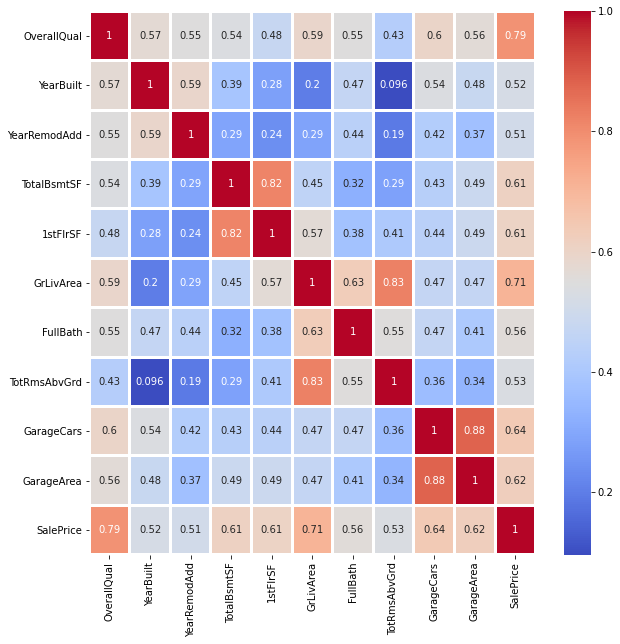

In [15]:
local_corr=train[high_corr_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(local_corr, cmap='coolwarm', linewidth=2, annot=True)

#### Observing relationship of high correlation features using regression plot

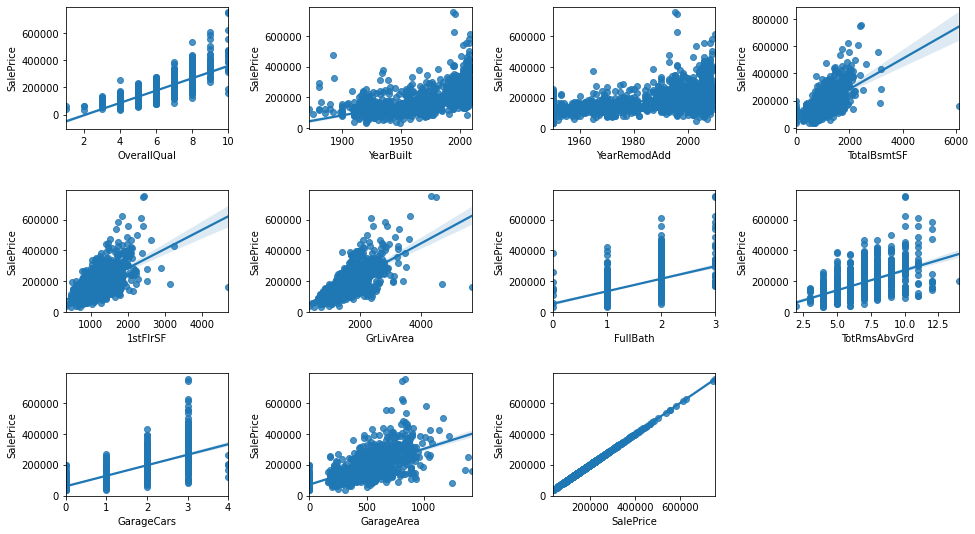

In [16]:
plt.figure(figsize=(16,9))
for i in range(len(high_corr_features)):
    plt.subplot(3,4,i+1)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.regplot(x=high_corr_features[i], y='SalePrice', data=train)

In [19]:
alldata.shape

(2919, 77)

## Handling the missing data

In [20]:
fix_columns=alldata.columns[alldata.isnull().any()]
fix_columns

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType', 'SalePrice'],
      dtype='object')

In [21]:
null_percent=pd.DataFrame(((alldata.isnull().sum()/alldata.shape[0]) * 100), columns=['Percent'])
null_percent.sort_values(by='Percent', ascending=False)

,Percent
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageCond,5.447071
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageQual,5.447071
GarageType,5.378554
BsmtExposure,2.809181
BsmtCond,2.809181


#### Dividing the data into numerical and categorical features

In [22]:
obj_col=alldata[fix_columns].columns[alldata[fix_columns].dtypes=='object']
obj_col_all=alldata.columns[alldata.dtypes=='object']

num_col=alldata[fix_columns].columns[alldata[fix_columns].dtypes!='object']
num_col_all=alldata.columns[alldata.dtypes!='object']

print('categorical columns with missing data: {} \n numerical columns with missing data: {}'.format(obj_col,num_col))

categorical columns with missing data: Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object') 
 numerical columns with missing data: Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


#### Cleaning categorical data

In [23]:
null_percent2=pd.DataFrame(alldata[obj_col].isnull().sum(), columns=['missing'])
null_percent2.sort_values(by='missing', ascending=False)

,missing
FireplaceQu,1420
GarageCond,159
GarageQual,159
GarageFinish,159
GarageType,157
BsmtCond,82
BsmtExposure,82
BsmtQual,81
BsmtFinType2,80
BsmtFinType1,79


In [24]:
NA = ['FireplaceQu','GarageCond','GarageQual','GarageFinish','GarageType','BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1'] 
alldata[NA] = alldata[NA].fillna('NA')

In [26]:
lowNA=(alldata[obj_col].isnull().sum()>0).index.tolist()
for column in lowNA:
    mode=alldata[column].mode()[0]
    alldata[column].fillna(mode,inplace=True)

In [27]:
alldata[obj_col].isnull().sum()

MSZoning        0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
SaleType        0
dtype: int64

#### Cleaning numerical data

In [28]:
alldata[num_col].isnull().sum()

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

In [29]:
alldata[num_col]

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0,208500.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0,181500.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0,223500.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0,140000.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,NaN,0.0,0.0,NaN
1455,21.0,0.0,252.0,0.0,294.0,546.0,0.0,0.0,1970.0,1.0,286.0,NaN
1456,160.0,0.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1960.0,2.0,576.0,NaN
1457,62.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,NaN,0.0,0.0,NaN


In [30]:
alldata['LotFrontage']=alldata['LotFrontage'].fillna(alldata['LotFrontage'].median())

In [31]:
alldata[num_col].isnull().sum()

LotFrontage        0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

<Figure size 720x360 with 0 Axes>

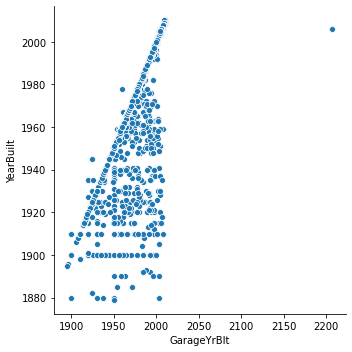

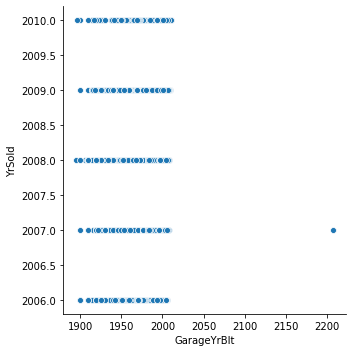

In [32]:
plt.figure(figsize=(10,5))
sns.relplot(x='GarageYrBlt', y='YearBuilt', data=alldata)
sns.relplot(x='GarageYrBlt', y='YrSold', data=alldata)

In [33]:
GarYr=(alldata['YrSold']-alldata['YearBuilt']).median()

In [34]:
alldata['GarageYrBlt']=alldata['GarageYrBlt'].fillna(alldata['YrSold']-35)

In [36]:
alldata[alldata['MasVnrArea'].isnull()][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,None
529,NaN,None
650,NaN,None
936,NaN,None
973,NaN,None
977,NaN,None
1243,NaN,None
1278,NaN,None
231,NaN,None
246,NaN,None


In [37]:
left=['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']
last=alldata[left]
last.fillna(0,inplace=True)
alldata.update(last)

In [38]:
alldata[left].isnull().sum()

MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageCars      0
GarageArea      0
dtype: int64

#### Variance of the given data

In [39]:
for col in alldata.columns[alldata.dtypes!='object']:
    print('{}    {:.2f}'.format(col,alldata[col].var()))

Id    710290.00
MSSubClass    1807.75
LotFrontage    454.45
LotArea    62204711.57
OverallQual    1.99
OverallCond    1.24
YearBuilt    917.57
YearRemodAdd    436.57
MasVnrArea    31988.96
BsmtFinSF1    207576.84
BsmtFinSF2    28621.57
BsmtUnfSF    193240.15
TotalBsmtSF    194587.29
1stFlrSF    153948.00
2ndFlrSF    183784.94
LowQualFinSF    2152.67
GrLivArea    256087.66
BsmtFullBath    0.28
BsmtHalfBath    0.06
FullBath    0.31
HalfBath    0.25
BedroomAbvGr    0.68
KitchenAbvGr    0.05
TotRmsAbvGrd    2.46
Fireplaces    0.42
GarageYrBlt    619.93
GarageCars    0.58
GarageArea    46455.63
WoodDeckSF    16008.98
OpenPorchSF    4566.45
EnclosedPorch    4127.32
3SsnPorch    634.44
ScreenPorch    3156.68
PoolArea    1271.92
MiscVal    321945.27
MoSold    7.37
YrSold    1.73
SalePrice    6311111264.30


#### Visualizing numerical data so as to drop features where one category is dominating others

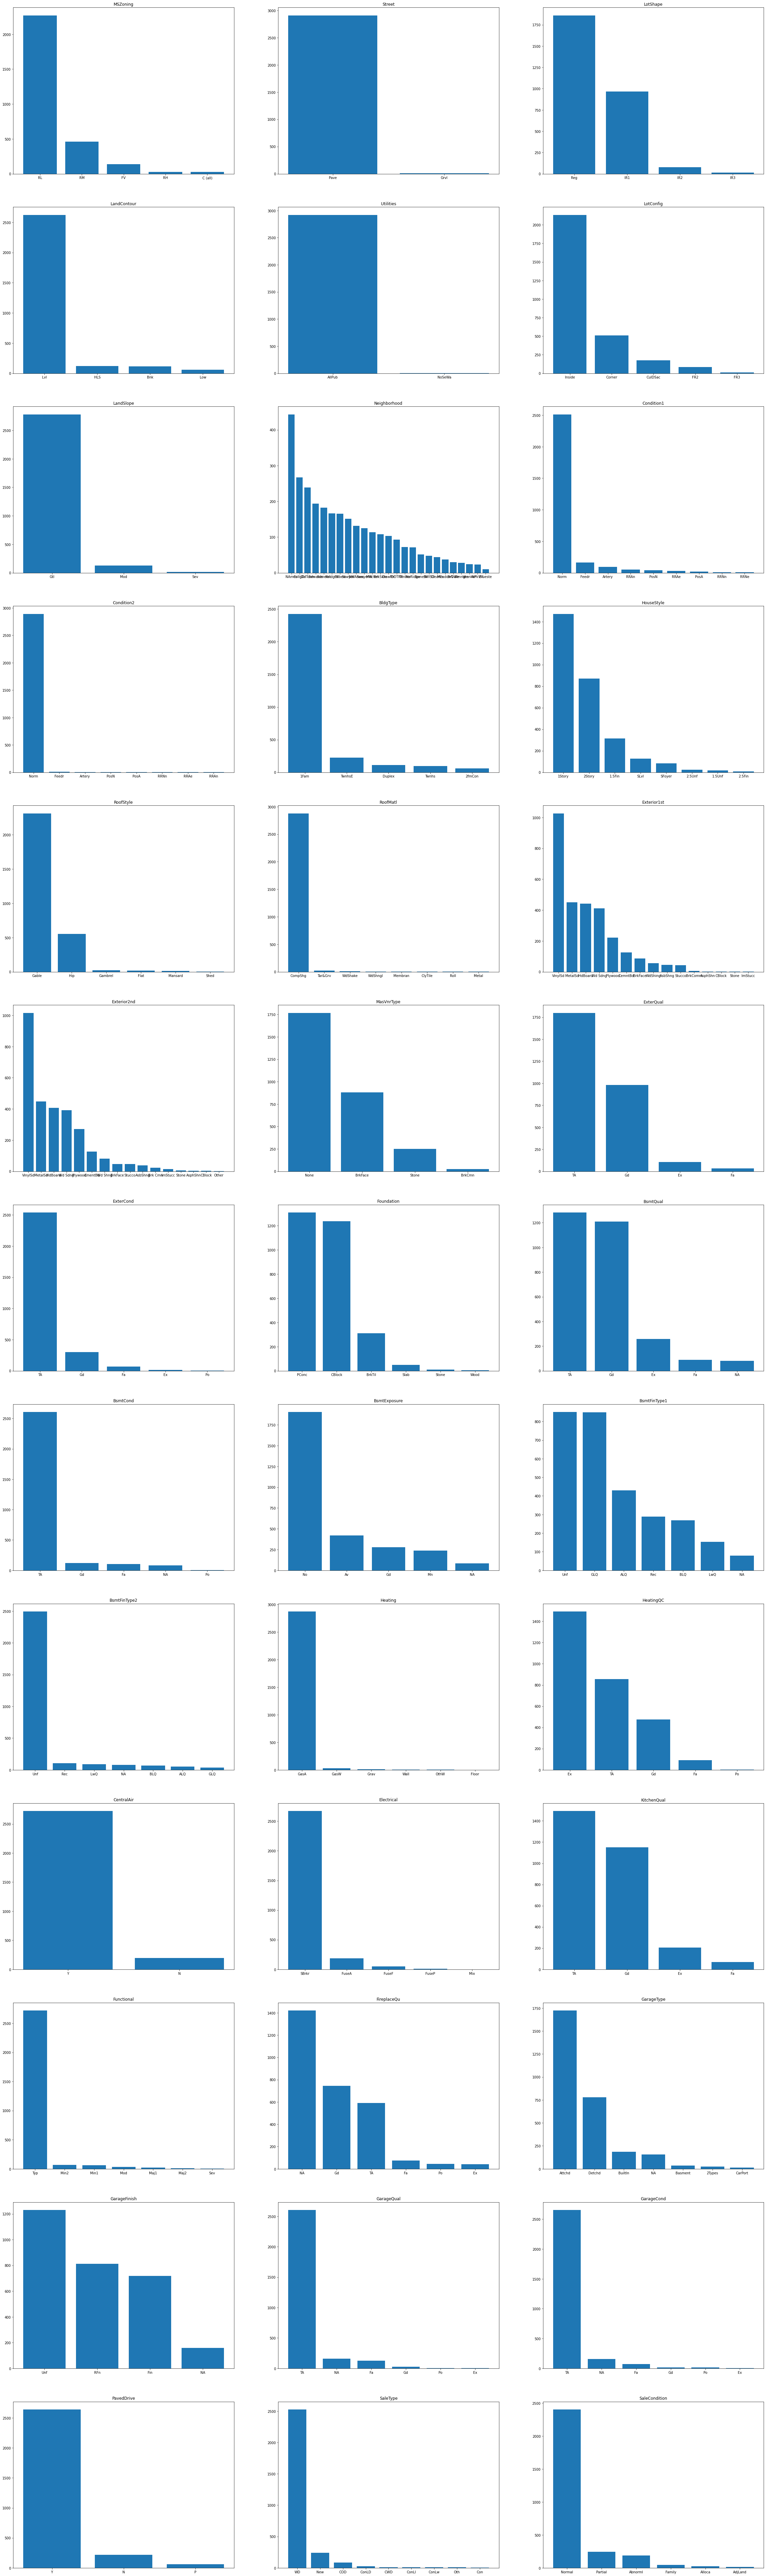

In [40]:
plt.figure(figsize=(40,140))
for i,num in zip(obj_col_all, range(len(obj_col_all))):
    plt.subplot(13,3,num+1)
    plt.bar(alldata[i].value_counts().index,alldata[i].value_counts())
    plt.title(i)

In [41]:
alldata.drop(['Street','Utilities','Condition2','RoofMatl','Heating','PoolArea'], axis=1,inplace=True) #Dropping non varying parameters

#### Observing unique values of the categorical data

In [42]:
for i in alldata[alldata.columns[alldata.dtypes=='object']]:
    print(i,alldata[alldata.columns[alldata.dtypes=='object']][i].unique(),'\n')

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH'] 

LotShape ['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour ['Lvl' 'Bnk' 'Low' 'HLS'] 

LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope ['Gtl' 'Mod' 'Sev'] 

Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'] 

Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'B

#### Features with similar type of data

In [43]:
change=['ExterQual','BsmtExposure','BsmtFinType1','BsmtFinType2','ExterCond','HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageCond', 'GarageQual','BsmtQual','BsmtCond','LotShape']
for i in change:
    print(i,alldata[i].unique(),'\n')
len(change)

ExterQual ['Gd' 'TA' 'Ex' 'Fa'] 

BsmtExposure ['No' 'Gd' 'Mn' 'Av' 'NA'] 

BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ'] 

BsmtFinType2 ['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ'] 

ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex'] 

HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po'] 

CentralAir ['Y' 'N'] 

KitchenQual ['Gd' 'TA' 'Ex' 'Fa'] 

FireplaceQu ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 

GarageCond ['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex'] 

GarageQual ['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po'] 

BsmtQual ['Gd' 'TA' 'Ex' 'NA' 'Fa'] 

BsmtCond ['TA' 'Gd' 'NA' 'Fa' 'Po'] 

LotShape ['Reg' 'IR1' 'IR2' 'IR3'] 



14

#### Assigning values as per their meaninng
Good given 5 and Poor given a score of 1 so that the machine learning model can understand the rating better and provide better prediction

In [44]:
bin_map = { 'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1, 'Y':1, 'N':0, 'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2,
           'No':1, 'Gd':3, 'Mn':2, 'Av':3, 'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0
}
for i in alldata[change]:
    alldata[i]=alldata[i].map(bin_map)
bin2={'N':0, 'P':1, 'Y':2}
alldata['PavedDrive'] =alldata['PavedDrive'].map(bin2)


In [45]:
for i in change:
    print(i,alldata[i].unique(),'\n')
len(change)

ExterQual [3 5 2] 

BsmtExposure [1 3 2 0] 

BsmtFinType1 [6 5 1 3 4 0 2] 

BsmtFinType2 [1 4 0 5 3 2 6] 

ExterCond [3 2 1 5] 

HeatingQC [5 3 2 1] 

CentralAir [1 0] 

KitchenQual [3 5 2] 

FireplaceQu [0 3 2 5 1] 

GarageCond [3 2 0 1 5] 

GarageQual [3 2 0 5 1] 

BsmtQual [3 5 0 2] 

BsmtCond [3 0 2 1] 

LotShape [3 2 1 0] 



14

#### Checking the heatmap of the features just transformed into numerical ranks

<AxesSubplot:>

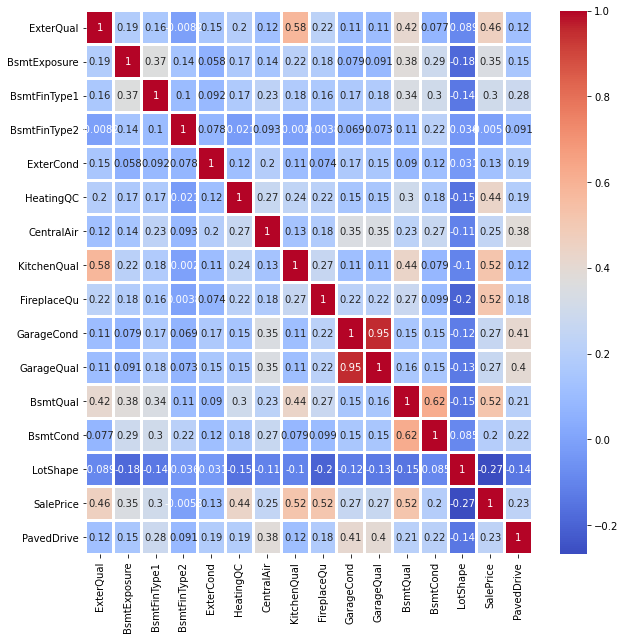

In [85]:
change2=change
change2.append('SalePrice')
change2.append('PavedDrive')

change_corr=alldata[change2].corr()
plt.figure(figsize=(10,10))
sns.heatmap(change_corr, cmap='coolwarm', linewidth=2, annot=True)

#### Creating Some new features

In [46]:
alldata['House_age']=alldata['YrSold']-alldata['YearBuilt']
alldata['House_age'].describe()

count    2919.000000
mean       36.479959
std        30.336182
min        -1.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: House_age, dtype: float64

#### Checking if the new feature created does not contain any absurd value such as a negative age

In [47]:
alldata[alldata['House_age'] < 0] 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,House_age
1089,2550,20,RL,128.0,39290,2,Bnk,Inside,Gtl,Edwards,Norm,1Fam,1Story,10,5,2008,2009,Hip,CemntBd,CmentBd,Stone,1224.0,5,3,PConc,5,3,3,6,4010.0,1,0.0,1085.0,5095.0,5,1,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,5,15,Typ,2,3,Attchd,2008.0,Fin,3.0,1154.0,3,3,2,546,484,0,0,0,17000,10,2007,New,Partial,NaN,-1


In [48]:
alldata.iloc[1089]['YrSold']=2010

In [49]:
alldata['House_age']=alldata['YrSold']-alldata['YearBuilt']


In [50]:
alldata[alldata['SalePrice'].isnull()].shape

(1459, 72)

In [51]:
alldata[alldata['SalePrice'].notnull()].shape

(1460, 72)

In [52]:
test=alldata[alldata['SalePrice'].isnull()]

In [53]:
train=alldata[alldata['SalePrice'].notnull()]

In [54]:
train.drop([1379,1298,523],inplace=True)

In [55]:
alldata2=pd.concat((train,test), sort=False)

#### Heatmap of complete data

<AxesSubplot:>

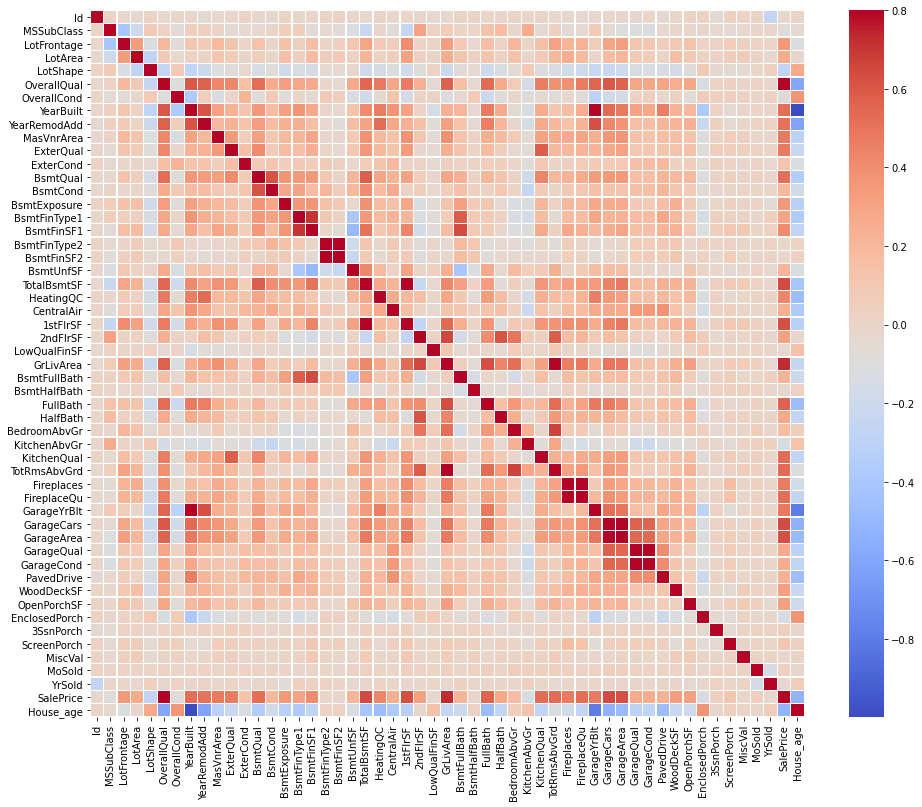

In [57]:
corrmat=alldata2.corr()
f, ax = plt.subplots(figsize=(16,13))
sns.heatmap(corrmat,linewidth=0.2,vmax=0.8,cmap='coolwarm')

In [58]:
most_corr_feat=corrmat.index[abs(corrmat['SalePrice'])>0.5]
high_corr=alldata[most_corr_feat].corr()

#### Heatmap of features with correlation greater than 0.5

<AxesSubplot:>

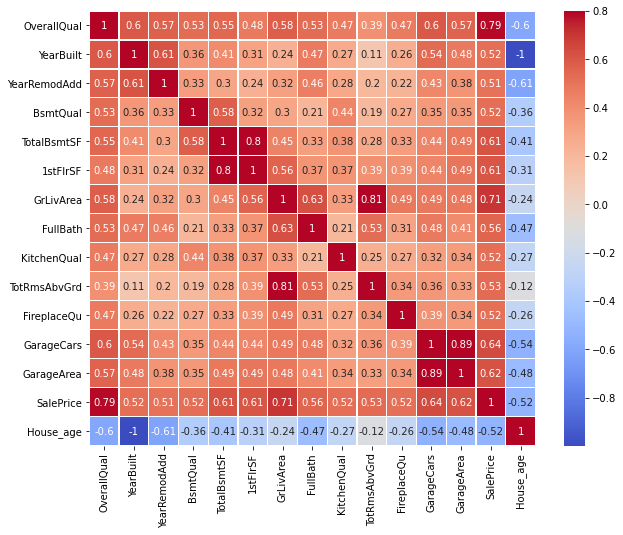

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(high_corr,linewidth=0.2,vmax=0.8,annot=True,cmap='coolwarm')

In [148]:
#alldata2.drop(['GarageArea','TotRmsAbvGrd','TotalBsmtSF'],axis=1,inplace=True) #Clearing for multicollinearity

In [59]:
vhigh_corr_feat=corrmat.index[abs(corrmat['SalePrice'])>0.55].tolist()
vhigh_corr_feat

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'GarageCars',
 'GarageArea',
 'SalePrice']

#### Pairplot showing distribution of the data and trend follwed by the data with some of the features

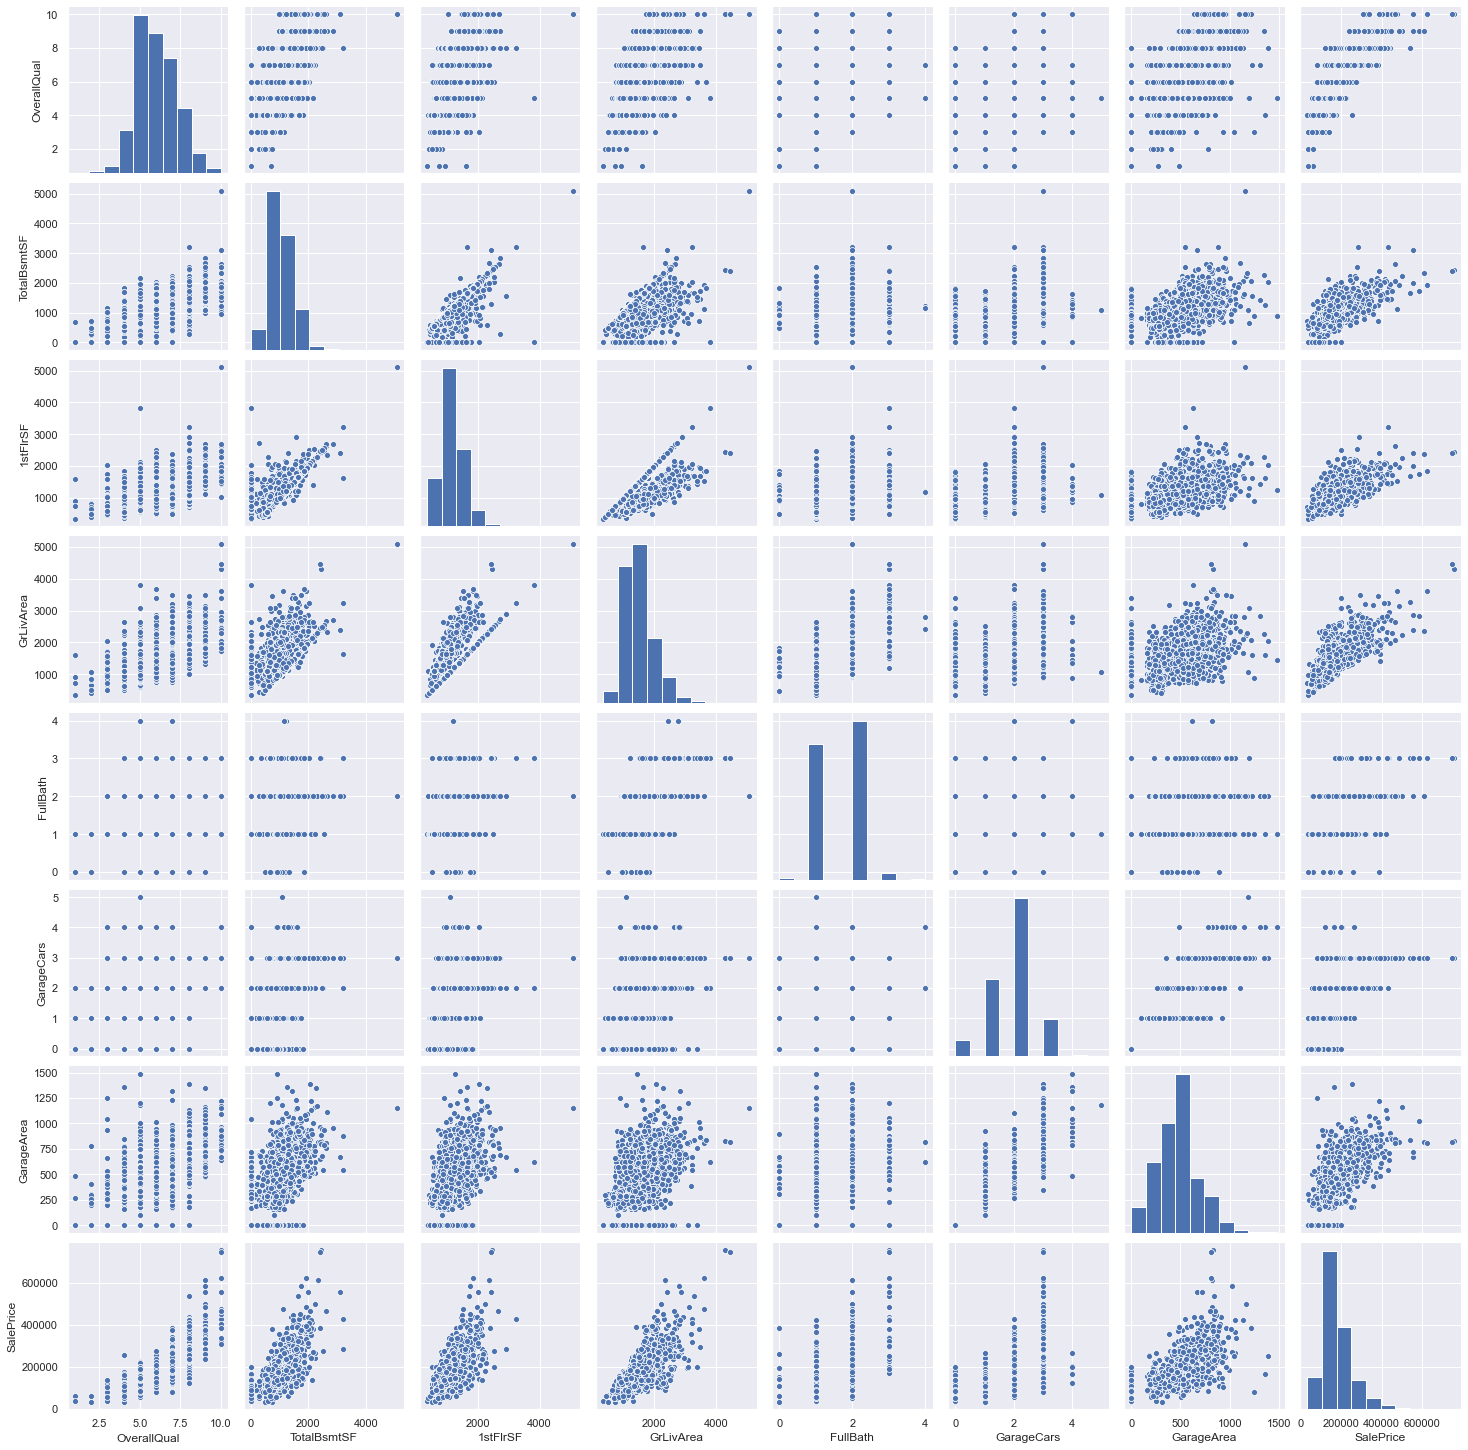

In [60]:
sns.set()
sns.pairplot(alldata2[vhigh_corr_feat], size=2.5)
plt.show()

#### Observing the distribution of the Sale Price data and calculating its skewness

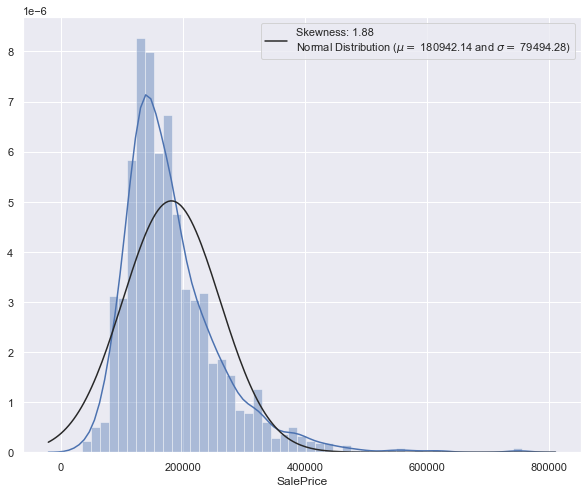

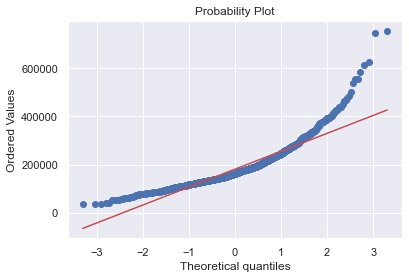

In [61]:
plt.figure(figsize=(10,8))
bar=sns.distplot(alldata2['SalePrice'], fit=norm)
mu,sigma=norm.fit(train['SalePrice'])
bar.legend(['Skewness: {:.2f}\nNormal Distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(alldata2['SalePrice'].skew(),mu,sigma)], loc='best');

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [62]:
alldata2.drop('House_age', axis=1,inplace=True)

In [63]:
skewed=[]
for i in alldata2.columns[alldata2.dtypes!='object']:
    sk=alldata2[i].skew()
    if abs(sk) > 0.5:
        skewed.append(i)


#### Features with skewness greater than 0.5

In [64]:
skewed

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'ExterQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [99]:
for i in skewed:
    alldata2[i]=np.log(alldata2[i]+1)

In [100]:
vhigh_corr_feat.remove('SalePrice')

ValueError: list.remove(x): x not in list

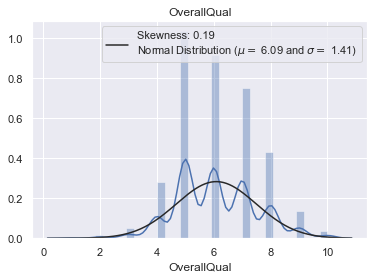

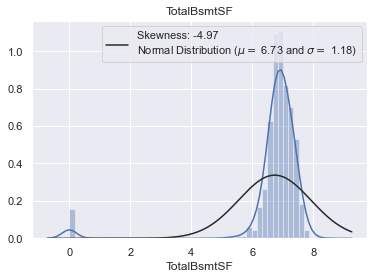

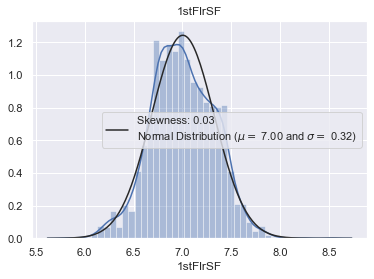

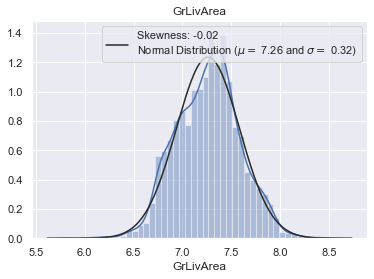

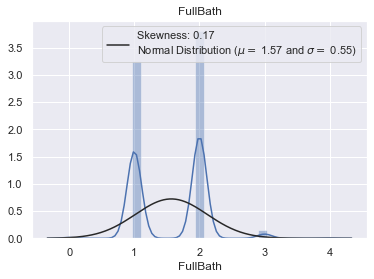

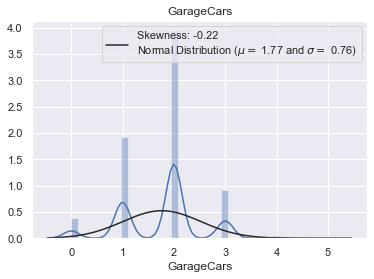

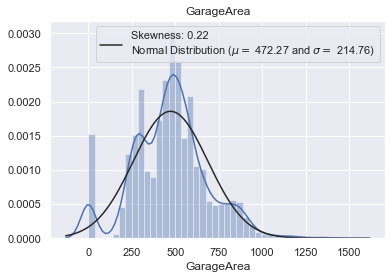

In [101]:
for i in vhigh_corr_feat:
    plt.figure()
    bar=sns.distplot(alldata2[i], fit=norm)
    mu,sigma=norm.fit(alldata2[i])
    bar.legend(['Skewness: {:.2f}\nNormal Distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(alldata2[i].skew(),mu,sigma)], loc='best');
    plt.title(i)
    

In [102]:
object_rem_col=alldata2.columns[alldata2.dtypes=='object'].tolist()
num_rem_col=alldata2.columns[alldata2.dtypes!='object'].tolist()

In [103]:
num_df=alldata2[num_rem_col]
object_df=alldata2[object_rem_col]
object_df

,MSZoning,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,Electrical,Functional,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,SBrkr,Typ,Attchd,RFn,WD,Normal
1,RL,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,SBrkr,Typ,Attchd,RFn,WD,Normal
2,RL,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,SBrkr,Typ,Attchd,RFn,WD,Normal
3,RL,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,SBrkr,Typ,Detchd,Unf,WD,Abnorml
4,RL,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,SBrkr,Typ,Attchd,RFn,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,Gable,CemntBd,CmentBd,None,CBlock,SBrkr,Typ,NA,NA,WD,Normal
1455,RM,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,Gable,CemntBd,CmentBd,None,CBlock,SBrkr,Typ,CarPort,Unf,WD,Abnorml
1456,RL,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,None,CBlock,SBrkr,Typ,Detchd,Unf,WD,Abnorml
1457,RL,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,SFoyer,Gable,HdBoard,Wd Shng,None,PConc,SBrkr,Typ,NA,NA,WD,Normal


In [104]:
num_df

,Id,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
0,1,4.110874,4.189655,9.042040,1.386294,7,1.791759,7.602900,2003,5.283204,1.386294,3,3,1.386294,0.693147,6,6.561031,0.693147,0.0,5.017280,6.753438,5,0.693147,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,1.386294,2.197225,0.000000,0,2003.0,2.0,548.0,1.386294,1.386294,1.098612,0.000000,4.127134,0.000000,0.0,0.0,0.000000,2,2008,12.247699
1,2,3.044522,4.394449,9.169623,1.386294,6,2.197225,7.589336,1976,0.000000,1.386294,3,3,1.386294,1.386294,5,6.886532,0.693147,0.0,5.652489,7.141245,5,0.693147,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,1.386294,1.945910,0.693147,3,1976.0,2.0,460.0,1.386294,1.386294,1.098612,5.700444,0.000000,0.000000,0.0,0.0,0.000000,5,2007,12.109016
2,3,4.110874,4.234107,9.328212,1.098612,7,1.791759,7.601902,2002,5.093750,1.386294,3,3,1.386294,1.098612,6,6.188264,0.693147,0.0,6.075346,6.825460,5,0.693147,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,1.386294,1.945910,0.693147,3,2001.0,2.0,608.0,1.386294,1.386294,1.098612,0.000000,3.761200,0.000000,0.0,0.0,0.000000,9,2008,12.317171
3,4,4.262680,4.110874,9.164401,1.098612,7,1.791759,7.557995,1970,0.000000,1.386294,3,3,1.386294,0.693147,5,5.379897,0.693147,0.0,6.293419,6.629363,3,0.693147,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,1.386294,2.079442,0.693147,3,1998.0,3.0,642.0,1.386294,1.386294,1.098612,0.000000,3.583519,5.609472,0.0,0.0,0.000000,2,2006,11.849405
4,5,4.110874,4.442651,9.565284,1.098612,8,1.791759,7.601402,2000,5.860786,1.386294,3,3,1.386294,1.386294,6,6.486161,0.693147,0.0,6.196444,7.044033,5,0.693147,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,1.386294,2.302585,0.693147,3,2000.0,3.0,836.0,1.386294,1.386294,1.098612,5.262690,4.442651,0.000000,0.0,0.0,0.000000,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,5.081404,3.091042,7.568896,1.386294,4,2.079442,7.586296,1970,0.000000,1.386294,3,3,1.386294,0.693147,1,0.000000,0.693147,0.0,6.304449,6.304449,3,0.693147,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,1,0.693147,3,0.693147,1.386294,1.791759,0.000000,0,1971.0,0.0,0.0,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.0,0.0,0.000000,6,2006,NaN
1455,2916,5.081404,3.091042,7.546974,1.386294,4,1.791759,7.586296,1970,0.000000,1.386294,3,3,1.386294,0.693147,3,5.533389,0.693147,0.0,5.686975,6.304449,3,0.693147,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,1,0.693147,3,0.693147,1.386294,1.945910,0.000000,0,1970.0,1.0,286.0,1.386294,1.386294,1.098612,0.000000,3.218876,0.000000,0.0,0.0,0.000000,4,2006,NaN
1456,2917,3.044522,5.081404,9.903538,1.386294,5,2.079442,7.581210,1996,0.000000,1.386294,3,3,1.386294,0.693147,5,7.110696,0.693147,0.0,0.000000,7.110696,5,0.693147,7.110696,0.000000,0.0,7.110696,0.693147,0.000000,1,0.000000,4,0.693147,1.386294,2.079442,0.693147,3,1960.0,2.0,576.0,1.386294,1.386294,1.098612,6.163315,0.000000,0.000000,0.0,0.0,0.000000,9,2006,NaN
1457,2918,4.454347,4.143135,9.253591,1.386294,5,1.791759,7.597396,1992,0.000000,1.386294,3,3,1.386294,1.386294,6,5.823046,0.693147,0.0,6.356108,6.816736,3,0.693147,6.878326,0.000000,0.0,6.878326,0.000000,0.693147,1,0.000000,3,0.693147,1.386294,1.945910,0.000000,0,1971.0,0.0,0.0,0.000000,0.000000,1.098612,4.394449,3.496508,

#### Applying get dummies to conver remaining object data to numerical


In [105]:
object_df=pd.get_dummies(object_df)
object_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [111]:
finaldf=pd.concat([num_df,object_df],axis=1,sort=False)
finaldf1=finaldf.copy()
finaldf.drop(['Id','SalePrice'],axis=1,inplace=True)
SalePrice=finaldf1['SalePrice'][:1457]
test1=finaldf1[1457:]


In [112]:
train=finaldf[:1457]
test=finaldf[1457:]

test.shape

(1459, 199)

### Scaling the data

In [113]:
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
rscaler.fit(finaldf)
finaldf = rscaler.transform(finaldf)

In [114]:
finaldf.shape

(2916, 199)

In [115]:
X_train=finaldf[:1457]
X_test=finaldf[1457:]
y_train=SalePrice

### Calculating cross validation score

In [116]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

#### Applying Linear Regression 

In [117]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[-1.380581673686194e+19]

In [118]:
# Cross validation
cross_validation = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of LR model = ", cross_validation)
print("\nCross validation mean accuracy of LR model = ", cross_validation.mean())

Cross validation accuracy of LR model =  [ 9.06162369e-01  9.39823896e-01 -4.68938536e+17  9.12424080e-01
 -4.97724596e+18  9.09665282e-01 -3.34095594e+16 -5.44931520e+17
 -6.49961912e+18 -1.44479832e+17]

Cross validation mean accuracy of LR model =  -1.266862452527026e+18


#### Applying Ridge Regression

In [119]:
rdg = linear_model.Ridge()
test_model(rdg)

[0.9142252520961517]

#### Applying Lasso Regression

In [120]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.9148962694339445]

#### Applying support vector machine

In [121]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
test_model(svr_reg)

[0.863976840825292]

#### Applying Decision Tree regressor

In [122]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

[0.7265624152814425]

#### Applying Random Forest Regressor

In [123]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

[0.8689815661500444]

#### Applying Bagging and Gradient Boost Regressor

In [124]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)

In [125]:
test_model(br_reg)


[0.8688654990207884]

In [126]:
test_model(gbr_reg)


[0.9072802333137965]

Gradient boost regressor provided a score of 90% Hence we will predict the values using it.

#### Applying XGBoost

In [127]:
import xgboost
#xgb_reg=xgboost.XGBRegressor()
xgb_reg = xgboost.XGBRegressor(bbooster='gbtree', random_state=51)
test_model(xgb_reg)

[17:33:30] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.8\Release\xgboost\src\learner.cc:480: 
Parameters: { bbooster } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:30] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.8\Release\xgboost\src\learner.cc:480: 
Parameters: { bbooster } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:31] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.8\Release\xgboost\src\learner.cc:480: 
Parameters: { bbooster } might not b

[0.8851231233151481]

### Training and testing the dataset on gradient boost regressor

In [128]:
gbr_reg.fit(X_train,y_train)
y_pred=np.exp(gbr_reg.predict(X_test)).round(2)
submit_test=pd.concat([test1['Id'],pd.DataFrame(y_pred)], axis=1)
submit_test.columns=['Id', 'SalePrice']

In [129]:
np.exp(gbr_reg.predict(X_test))

array([121688.57275478, 157078.24174323, 187833.03855412, ...,
       143350.20146421, 117565.74688315, 234240.19289512])

In [132]:
submit_test.to_csv('sample_submission1', index=False)

In [131]:
submit_test

,Id,SalePrice
0,1461,121688.57
1,1462,157078.24
2,1463,187833.04
3,1464,198800.19
4,1465,179660.02
...,...,...
1454,2915,77312.84
1455,2916,75398.44
1456,2917,143350.20
1457,2918,117565.75
